# Soal 1

Sebuah pengukur diameter bola besi dipasang secara otomatis dalam sebuah pabrik. Pengukur tersebut hanya akan meloloskan diameter bola 1.50 ± d cm. Diketahui bahwa bola produksi pabrik tersebut memiliki diameter yang terdistribusi normal dengan rata-rata 1.50 dan standard deviasi 0.2 cm. Jika diinginkan bahwa 95% produksinya lolos seleksi, berapakah nilai d harus ditetapkan?

### Jawaban

Import Library

In [21]:
import numpy as np
from scipy.special import erfinv
import matplotlib.pyplot as plt

Mendata semua variabel yang diketahui pada soal

In [22]:
# Diberikan
mean = 1.5     # Rata-rata diameter bola (cm)
std_dev = 0.2  # Standar deviasi diameter bola (cm)
conf_level = 0.95  # Tingkat kepercayaan yang diinginkan

Menghitung z score berdasarkan tingkat kepercayaan 95%

In [23]:
# Menghitung nilai z-score untuk tingkat kepercayaan 95%
z_score = np.abs(np.sqrt(2) * erfinv(conf_level))
print(f"Nilai z-score untuk tingkat kepercayaan {conf_level*100}% adalah: {z_score:.2f}")

Nilai z-score untuk tingkat kepercayaan 95.0% adalah: 1.96


Visualisasi z score untuk tingkat kepercayaan 95%

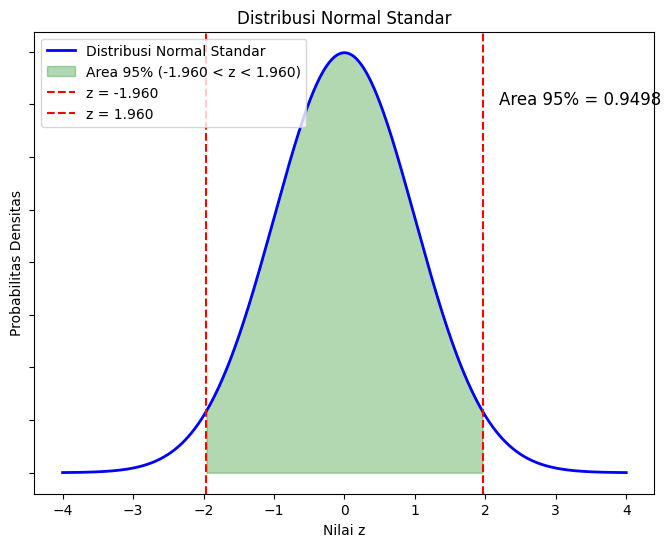

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat array x untuk visualisasi distribusi normal standar
x = np.linspace(-4, 4, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Menghitung area di bawah kurva antara -1.96 dan 1.96 (95% dari total area)
area_95 = np.trapz(y[(x >= -z_score) & (x <= z_score)], x[(x >= -z_score) & (x <= z_score)])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'b-', lw=2, label='Distribusi Normal Standar')
ax.fill_between(x, 0, y, where=(x >= -z_score) & (x <= z_score), color='g', alpha=0.3, label=f'Area 95% (-{z_score:.3f} < z < {z_score:.3f})')
ax.axvline(-z_score, color='r', linestyle='--', label=f'z = -{z_score:.3f}')
ax.axvline(z_score, color='r', linestyle='--', label=f'z = {z_score:.3f}')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Standar')
ax.set_xlabel('Nilai z')
ax.set_ylabel('Probabilitas Densitas')
ax.text(2.2, 0.35, f'Area 95% = {area_95:.4f}', fontsize=12)
ax.tick_params(axis='y', labelleft=False)  # Menyembunyikan angka pada sumbu y
plt.savefig("visualisasi-95-persen.jpg")
plt.show()

Menghitung nilai d

In [25]:
d = z_score * std_dev
print(f"Nilai d adalah: {d:.3f} cm")

Nilai d adalah: 0.392 cm


Menampilkan rentang diameter yang diloloskan

In [26]:
lower_bound = mean - d
upper_bound = mean + d
print(f"Rentang diameter yang diloloskan: {lower_bound:.3f} cm - {upper_bound:.3f} cm")

Rentang diameter yang diloloskan: 1.108 cm - 1.892 cm


Memvisualisasikan distribusi normal dengan rentang yang diinginkan soal

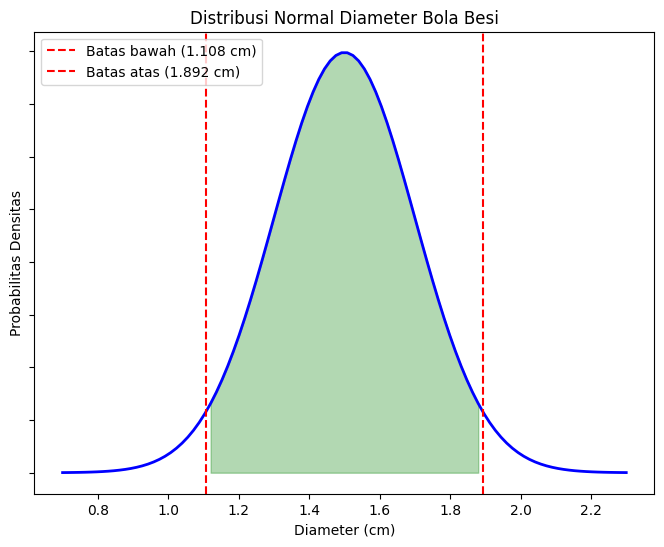

In [29]:
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'b-', lw=2)
ax.fill_between(x, 0, y, where=(x >= lower_bound) & (x <= upper_bound), color='g', alpha=0.3)
ax.axvline(lower_bound, color='r', linestyle='--', label=f'Batas bawah ({lower_bound:.3f} cm)')
ax.axvline(upper_bound, color='r', linestyle='--', label=f'Batas atas ({upper_bound:.3f} cm)')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Diameter Bola Besi')
ax.set_xlabel('Diameter (cm)')
ax.set_ylabel('Probabilitas Densitas')
ax.tick_params(axis='y', labelleft=False)  # Menyembunyikan angka pada sumbu y
plt.savefig("soal-1.jpg")
plt.show()